In [33]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
# Load the CSV file
df= pd.read_csv('Admission_Predict.csv')
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
print(df.shape)

(500, 9)


In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

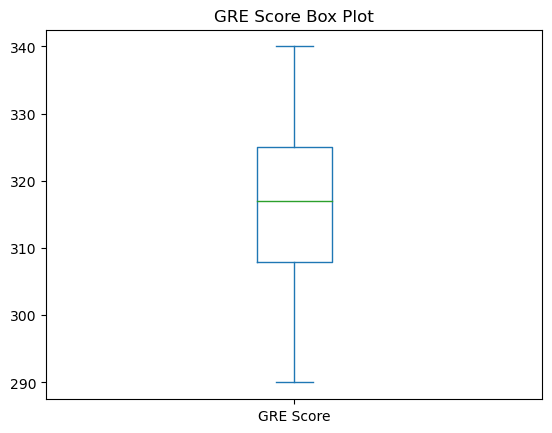

In [9]:
df['GRE Score'].plot(kind='box', title="GRE Score Box Plot")
plt.show()

In [10]:
df.std

<bound method NDFrame._add_numeric_operations.<locals>.std of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5

In [11]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

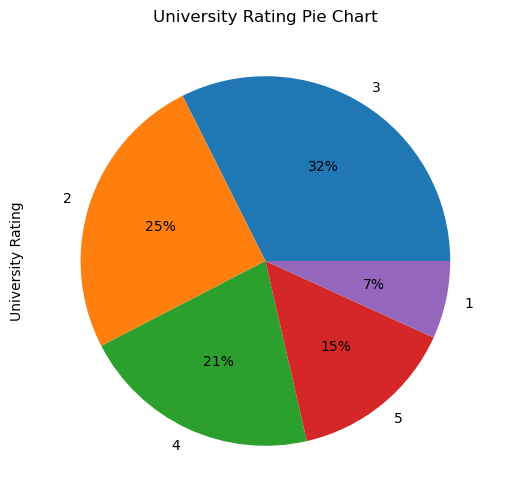

In [12]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="University Rating Pie Chart")
plt.show()

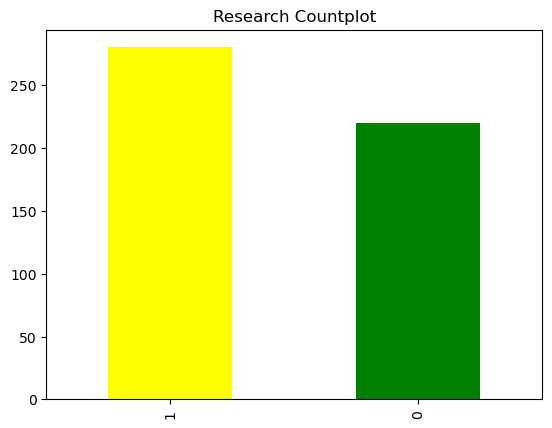

In [15]:
df.Research.value_counts().plot(kind='bar',title="Research Countplot",color=["yellow","green"])
plt.show()

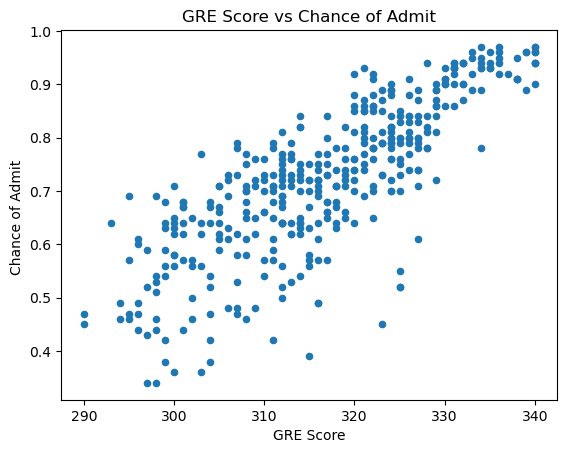

In [38]:
df.plot(kind="scatter", x='GRE Score', y = 'Chance of Admit ', title="GRE Score vs Chance of Admit")
plt.show()

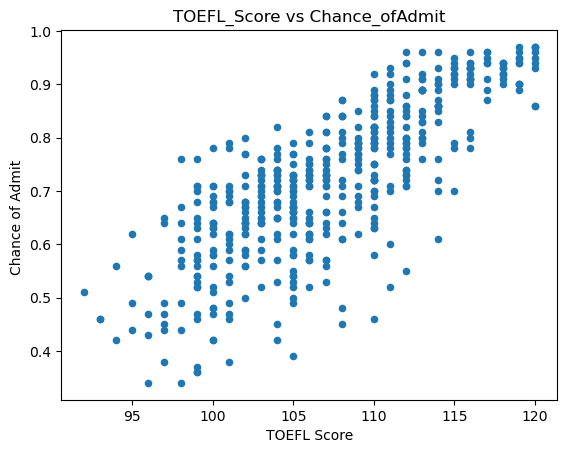

In [17]:
df.plot(kind="scatter", x='TOEFL Score', y = 'Chance of Admit ' , title="TOEFL_Score vs Chance_ofAdmit")
plt.show()

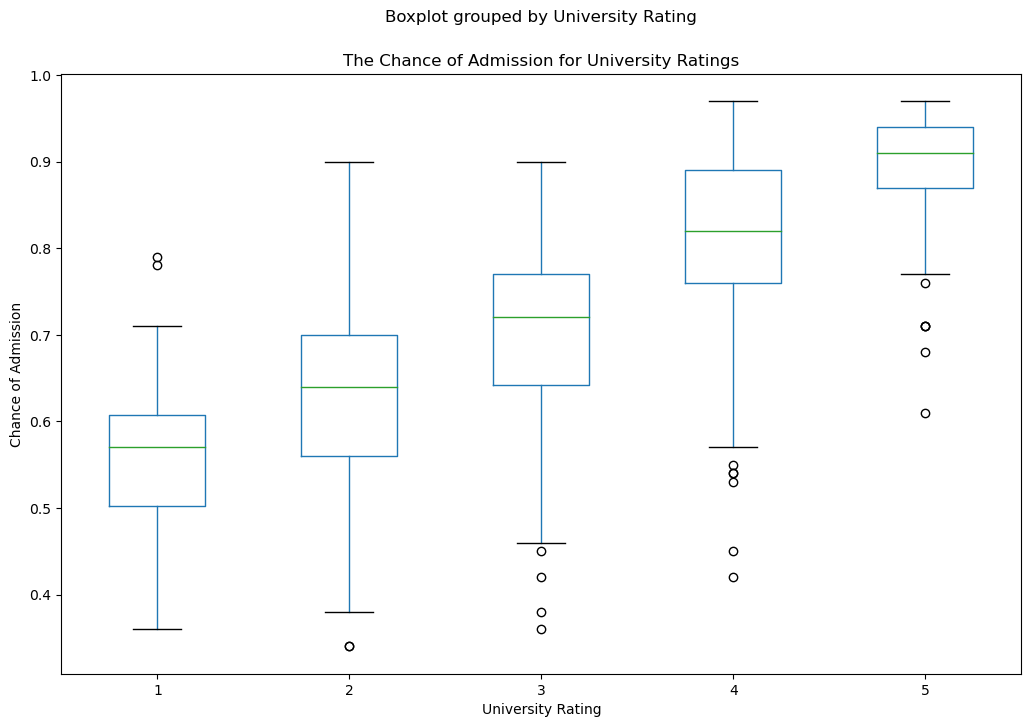

In [23]:
df.boxplot(column='Chance of Admit ',by='University Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

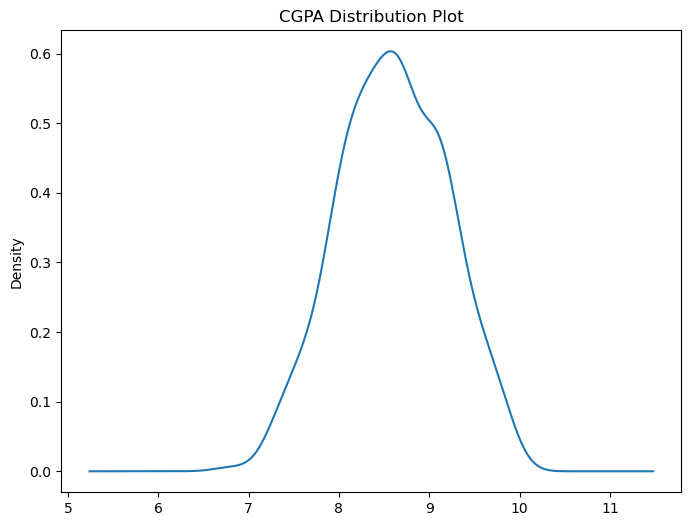

In [29]:
df.CGPA.plot(kind="kde", figsize=(8,6), title="CGPA Distribution Plot")
plt.show()


In [17]:
X = df.iloc[:,:-1]
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [18]:
y = df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,4,322,110,3,3.5,2.5,8.67,1
18,19,318,110,3,4.0,3.0,8.80,0
202,203,340,120,5,4.5,4.5,9.91,1
250,251,320,104,3,3.0,2.5,8.57,1
274,275,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...,...
71,72,336,112,5,5.0,5.0,9.76,1
106,107,329,111,4,4.5,4.5,9.18,1
270,271,306,105,2,2.5,3.0,8.22,1
348,349,302,99,1,2.0,2.0,7.25,0


In [21]:
lr = LinearRegression()


In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
r2_score(y_test, y_pred)

0.8212241793299225

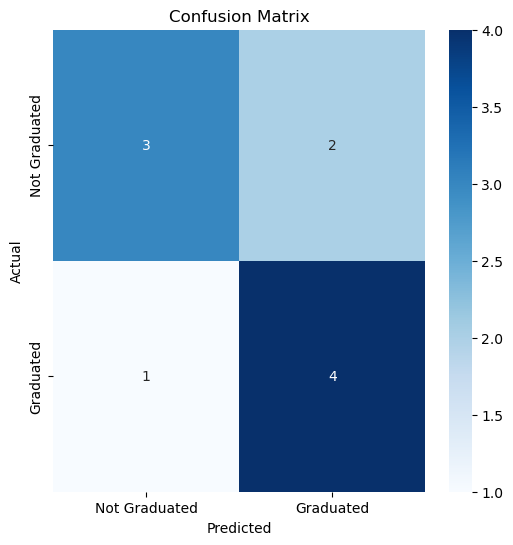

In [35]:
y_actual = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

# Create the confusion matrix
cm = confusion_matrix(y_actual, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Graduated", "Graduated"],
            yticklabels=["Not Graduated", "Graduated"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

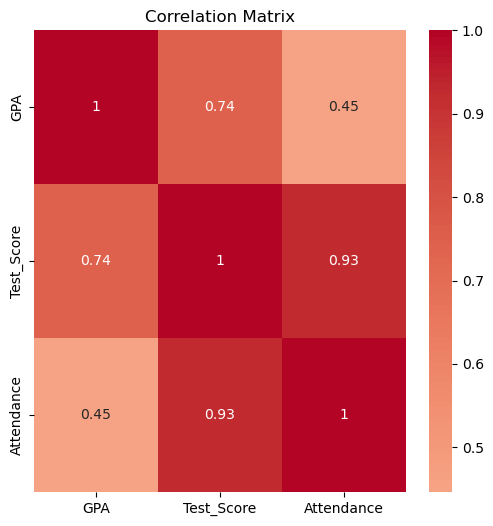

In [36]:
data = {
    'GPA': [3.2, 3.5, 3.8, 3.1, 3.6],
    'Test_Score': [85, 92, 88, 78, 90],
    'Attendance': [90, 95, 87, 80, 92]
}
df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()



